In [1]:
from mpl_toolkits import mplot3d
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
 #Code to convert text file from Openbci and save it as CSV with added channel names --- already done and saved.
import pandas as pd
df = pd.read_csv("../Python/Dataset/EEG_dataset/Joan.txt")
df.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m'] #channels Fp1, Fp2, F3, F4(a, b, c, d)
df.to_csv('Joan.txt')

In [2]:
# Generating EEG signals

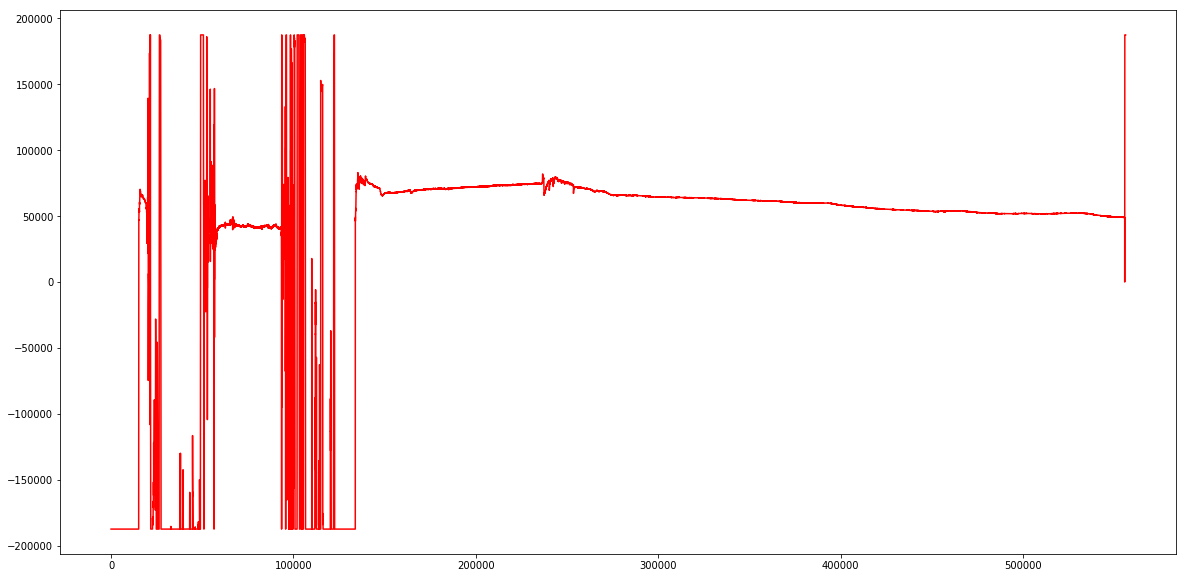

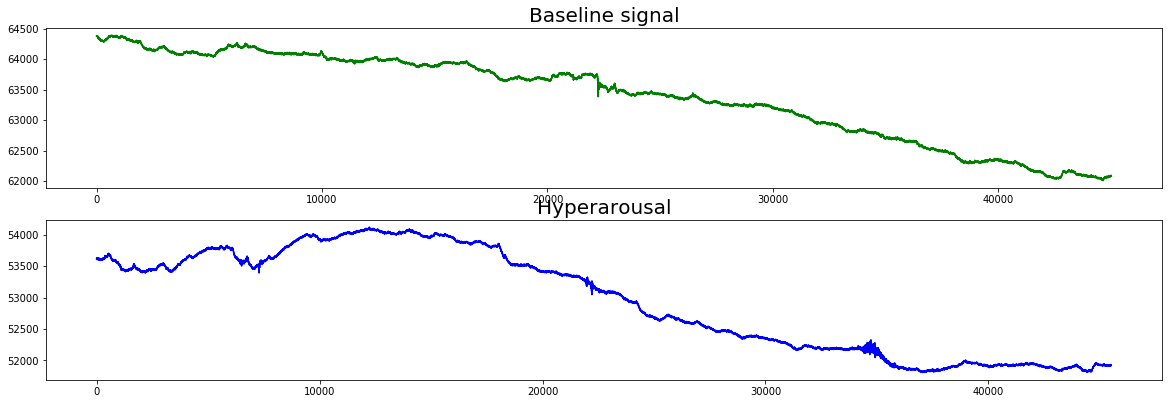

In [3]:
 #Select channels and remove set up noise
 #Read csv file of subject from the path
import pandas as pd
df = pd.read_csv("../Python/Dataset/EEG_dataset/S017.txt", usecols=['b'])  # change name of subject and channel here
saved_column = df.b #change channel here

 #plot the entire EEG data from the subject
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(saved_column,'r-')

 #add vertical lines to mark the begining and end of useful data
#xposition = [0.0, 90500]  
#for xc in xposition:
   # plt.axvline(x=xc, color='k', linestyle='--')
#plt.title('Raw EEG signal- Channel FP2', fontsize=20)
#plt.xlabel('Samples', fontsize=18)
#plt.ylabel('Amplitude', fontsize=16)

 #Extract baseline and hyperarousal EEG from entire data
 #add the sample begining and end calculated based on the timestamp recorded
saved_column1 = saved_column[305000:350000]           #-------baseline data
saved_column2 = saved_column[450000:495500]          #-------hyperarousal data
#saved_column3 = saved_column[180500:225500]         #-------post intervention data

 #plot the differrent sets of data as separate figures
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(range(len(saved_column1)),saved_column1, 'g-')
plt.title('Baseline signal' ,fontsize=20)
plt.subplot(312)
plt.plot(range(len(saved_column2)),saved_column2, 'b-')
plt.title('Hyperarousal',fontsize=20)
#plt.subplot(313)
#plt.plot(range(len(saved_column3)),saved_column3)
#plt.title('Post intervention signal',fontsize=20)

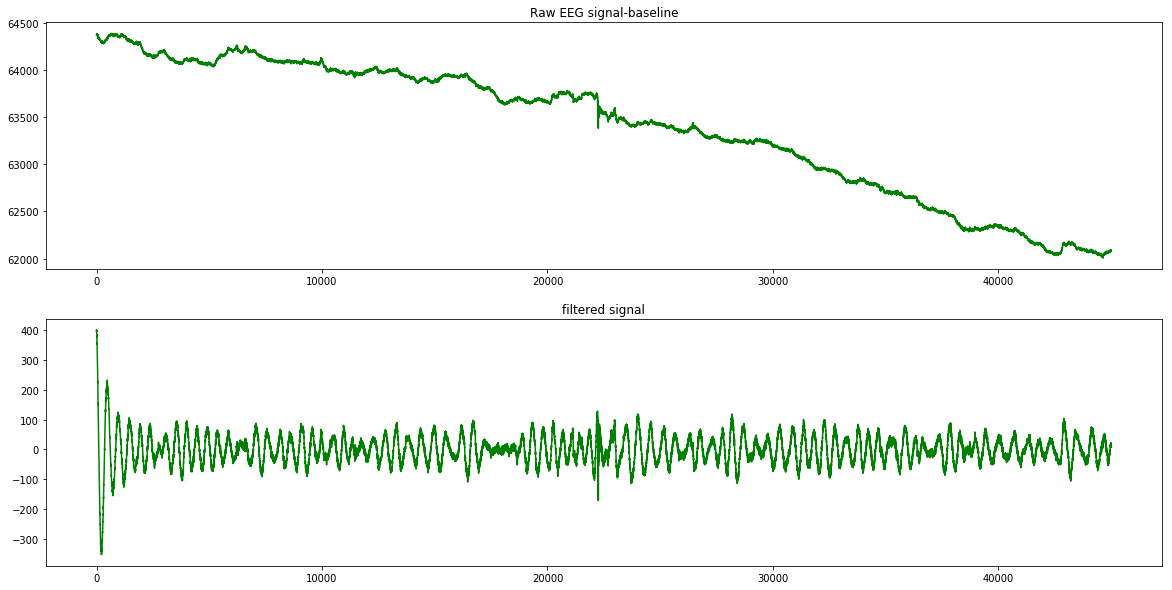

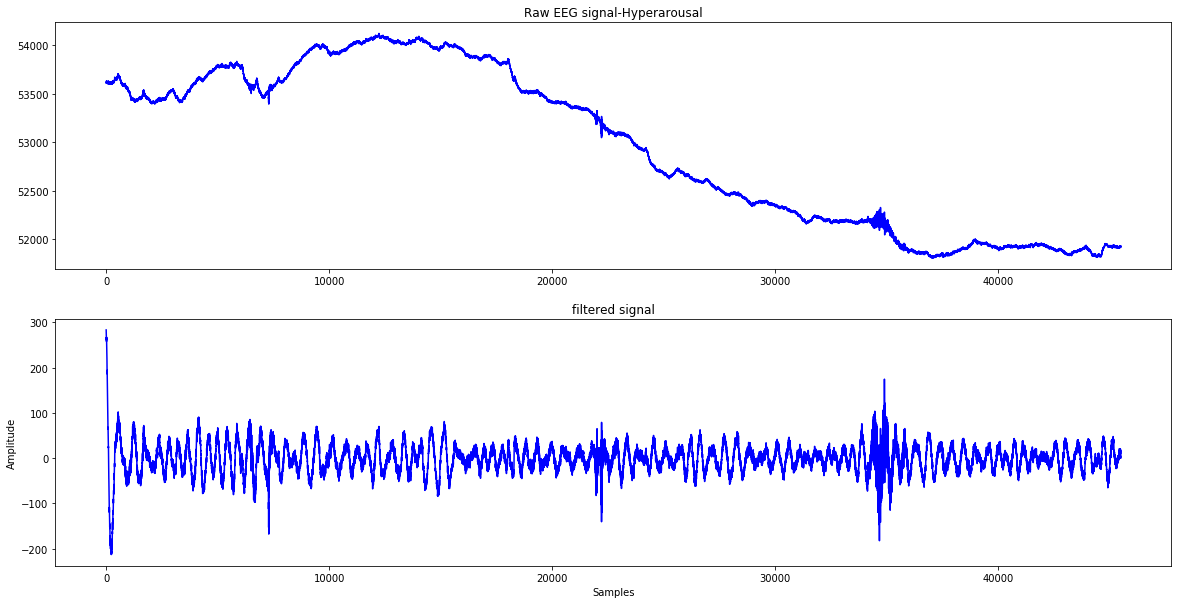

In [4]:
# selected range bring it into normal amplitude range by removing dc offset
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=7):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=7):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 250


 #Baseline signal dc offset removal
base = butter_highpass_filter(saved_column1,0.5,fps)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(saved_column1)),saved_column1,'g-')
plt.title('Raw EEG signal-baseline')
plt.subplot(212)
plt.plot(range(len(base)),base,'g-')
plt.title('filtered signal')
plt.show()

 #hyperarousal signal dc offset removal
hyper = butter_highpass_filter(saved_column2,0.5,fps)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(saved_column2)),saved_column2,'b-')
plt.title('Raw EEG signal-Hyperarousal')
plt.subplot(212)
plt.plot(range(len(hyper)),hyper,'b-')
plt.title('filtered signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

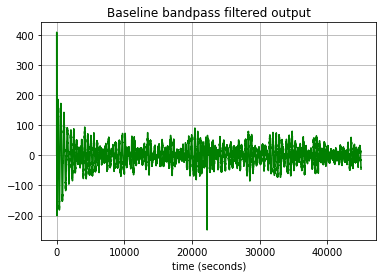

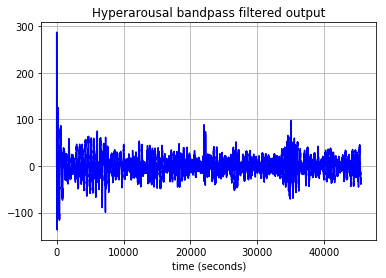

In [5]:
#band pass filter between 0.5 and 40 hz
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 250.0
    lowcut = 0.5
    highcut = 40.0

    
    # Filter a noisy signal.
    T = 1/250
    #nsamples = T * fs
    #t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 250.0  
    x1 = base
    x2 = hyper
    #x3 = post

    plt.figure(2)
    plt.clf()
    #plt.plot(x, label='Noisy signal')

    y1 = butter_bandpass_filter(x1, lowcut, highcut, fs, order=6)
    y2 = butter_bandpass_filter(x2, lowcut, highcut, fs, order=6)
    #y3 = butter_bandpass_filter(x3, lowcut, highcut, fs, order=6)
    
    plt.plot(y1, 'g-')
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.title('Baseline bandpass filtered output')
    
    
    plt.figure()
    
    plt.plot(y2, 'b-')
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.title('Hyperarousal bandpass filtered output')
   
    
    #plt.figure()    
    #plt.plot(y3, label='Filtered signal (%g Hz)' % f0)
    #plt.xlabel('time (seconds)')
    #plt.hlines([-a, a], 0, T, linestyles='--')
    #plt.grid(True)
    #plt.axis('tight')
    #plt.legend(loc='upper left')

    plt.show()

In [6]:
#notch filter apllied at 60hz
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

"'\narray3 = Implement_Notch_Filter(0.004, 1, 60, 1, 2, 'butter', y3)\nplt.figure()\nplt.plot(array3, label='Notch Filter (60 Hz)')\nplt.xlabel('Samples')\nplt.hlines([-a, a], 0, T, linestyles='--')\nplt.grid(True)\nplt.axis('tight')\nplt.legend(loc='upper left')\nplt.ylabel('Amplitude(unit)')\n"

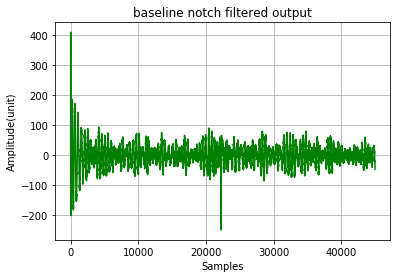

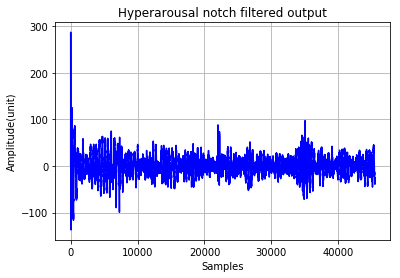

In [7]:
array1 = Implement_Notch_Filter(0.004, 1, 60, 1, 2, 'butter', y1)
plt.plot(array1, 'g-')
plt.xlabel('Samples')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.ylabel('Amplitude(unit)')
plt.title('baseline notch filtered output')

array2 = Implement_Notch_Filter(0.004, 1, 60, 1, 2, 'butter', y2)
plt.figure()
plt.plot(array2, 'b-')
plt.xlabel('Samples')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.ylabel('Amplitude(unit)')
plt.title('Hyperarousal notch filtered output')

''''
array3 = Implement_Notch_Filter(0.004, 1, 60, 1, 2, 'butter', y3)
plt.figure()
plt.plot(array3, label='Notch Filter (60 Hz)')
plt.xlabel('Samples')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.ylabel('Amplitude(unit)')
'''

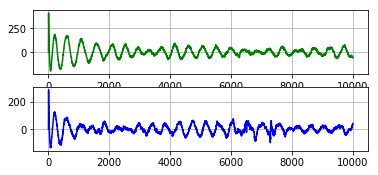

In [8]:
# Extracted signal
plt.subplot(311)
plt.grid()
plt.plot(array1[0:10000],'g')
plt.subplot(312)
plt.grid()
plt.plot(array2[0:10000],'b')
#plt.subplot(313)
#plt.plot(array3[5000:15000][::10],'g')

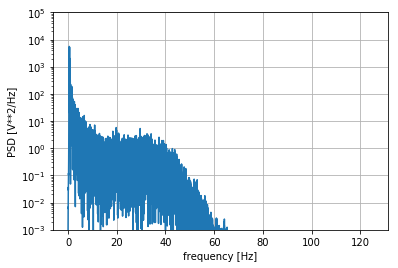

In [9]:
from scipy import signal
f, Pxx_den = signal.periodogram(array2, fs=250)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-3, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()

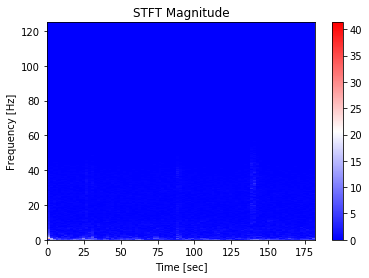

In [10]:
from scipy import signal
f, t, Zxx = signal.stft(array2, 250, nperseg=1000)
plt.pcolor(t, f, np.abs(Zxx), cmap='bwr')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

In [207]:
# feature extraction - class 1

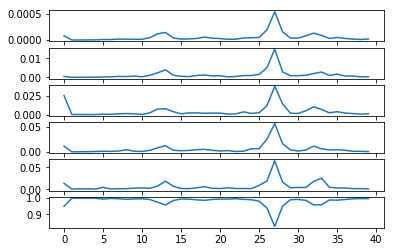

In [11]:
# feature extraction method
en, Num, e1, e2, e3, e4, e5, e6 = 0, 250, [], [], [], [], [], []
for st in range(0, 10000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = array1[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    e1.append(eR1)
    eR2 = eD2/eT
    e2.append(eR2)
    eR3 = eD3/eT
    e3.append(eR3)
    eR4 = eD4/eT
    e4.append(eR4)
    eR5 = eD5/eT
    e5.append(eR5)
    eRA5 = eA5/eT
    e6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"

plt.subplot(611)
plt.plot(e1)
plt.subplot(612)
plt.plot(e2)
plt.subplot(613)
plt.plot(e3)
plt.subplot(614)
plt.plot(e4)
plt.subplot(615)
plt.plot(e5)
plt.subplot(616)
plt.plot(e6)

In [12]:
# feature extraction- class 2

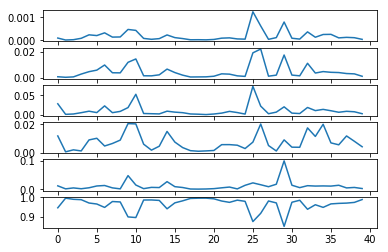

In [13]:
en, Num, f1, f2, f3, f4, f5, f6 = 0, 250, [], [], [], [], [], []
for st in range(0, 10000, Num):
    en = en + Num
    #Time domain feature extraction
    x1 = array2[st:en]
    from pywt import wavedec
    coeffs = wavedec(np.asarray(x1), 'db4', level=5)
    [cA5, cD5, cD4, cD3 ,cD2, cD1] = coeffs
    #cD1
    eD1 = sum(x*x for x in cD1)
    eD2 = sum(x*x for x in cD2)
    eD3 = sum(x*x for x in cD3)
    eD4 = sum(x*x for x in cD4)
    eD5 = sum(x*x for x in cD5)
    eA5 = sum(x*x for x in cA5)
    #print "eD1=",eD1, "\neD2=",eD2,"\neD3=",eD3, "\neD4=",eD4, "\neD5=",eD5, "\neA5=",eA5
    
    eT = eD1+eD2+eD3+eD4+eD5+eA5
    #print "\neT=",eT,"\n"
    eR1 = eD1/eT
    f1.append(eR1)
    eR2 = eD2/eT
    f2.append(eR2)
    eR3 = eD3/eT
    f3.append(eR3)
    eR4 = eD4/eT
    f4.append(eR4)
    eR5 = eD5/eT
    f5.append(eR5)
    eRA5 = eA5/eT
    f6.append(eRA5)
    #print "eR1=",eR1, "\neR2=",eR2,"\neR3=",eR3,"\neR4=",eR4, "\neR5=",eR5, "\neRA5=",eRA5,"\n"
    
plt.subplot(611)
plt.plot(f1)
plt.subplot(612)
plt.plot(f2)
plt.subplot(613)
plt.plot(f3)
plt.subplot(614)
plt.plot(f4)
plt.subplot(615)
plt.plot(f5)
plt.subplot(616)
plt.plot(f6)


In [211]:
# normalize the data1

In [14]:
e11, e22, e33, e44, e55, e66 = [], [], [], [], [], []
m = np.mean(e1)
v = np.std(e1)
for i in e1:
    it1 = (i-m)/v
    e11.append(it1)
m = np.mean(e2)
v = np.std(e2)
for i in e2:
    it2 = (i-m)/v
    e22.append(it2)
m = np.mean(e3)
v = np.std(e3)
for i in e3:
    it3 = (i-m)/v
    e33.append(it3)
m = np.mean(e4)
v = np.std(e4)
for i in e4:
    it4 = (i-m)/v
    e44.append(it4)
m = np.mean(e5)
v = np.std(e5)
for i in e5:
    it5 = (i-m)/v
    e55.append(it5)
m = np.mean(e6)
v = np.std(e6)
for i in e6:
    it6 = (i-m)/v
    e66.append(it6)

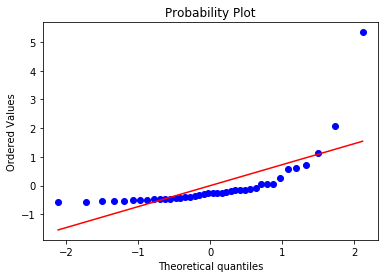

In [15]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(e44, plot=plt)

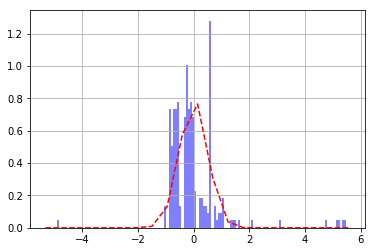

In [16]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 0.5 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([e11, e22, e33, e44, e55, e66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.grid()
plt.show()

In [17]:
# normalize the data2

In [18]:
f11, f22, f33, f44, f55, f66 = [], [], [], [], [], []
m = np.mean(f1)
v = np.std(f1)
for i in f1:
    it1 = (i-m)/v
    f11.append(it1)
m = np.mean(f2)
v = np.std(f2)
for i in f2:
    it2 = (i-m)/v
    f22.append(it2)
m = np.mean(f3)
v = np.std(f3)
for i in f3:
    it3 = (i-m)/v
    f33.append(it3)
m = np.mean(f4)
v = np.std(f4)
for i in f4:
    it4 = (i-m)/v
    f44.append(it4)
m = np.mean(f5)
v = np.std(f5)
for i in f5:
    it5 = (i-m)/v
    f55.append(it5)
m = np.mean(f6)
v = np.std(f6)
for i in f6:
    it6 = (i-m)/v
    f66.append(it6)

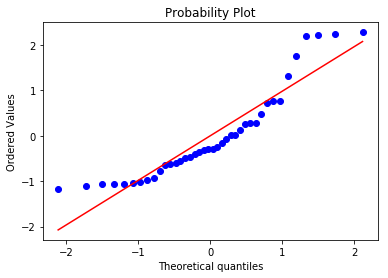

In [19]:
# normalization plots
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(f44, plot=plt)

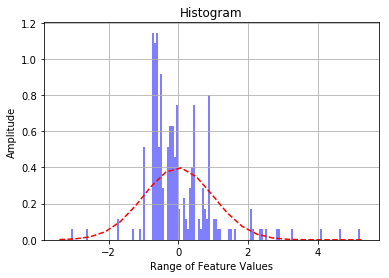

In [20]:
# histogram plots
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
mu = 0 # mean of distribution
sigma = 1 # standard deviation of distribution
 
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist([f11, f22, f33, f44, f55, f66], num_bins, normed=1, facecolor='blue', alpha=0.5)
 
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Range of Feature Values')
plt.ylabel('Amplitude')
plt.title('Histogram')
plt.grid()
plt.show()

In [21]:
 #generate target labels for baseline
e_d = np.transpose([e11, e22, e33, e44, e55, e66])
tar = np.ones((40,1))

In [22]:
 #generate target labels for hyperarousal
f_d = np.transpose([f11, f22, f33, f44, f55, f66])
tar1 = np.zeros((40,1))

In [23]:
 #generate single tAarget file and store the feature vector as csv to local folder
final=np.concatenate((e_d, f_d), axis=0)
target=np.concatenate((tar, tar1), axis=0)
import pandas as pd 
df = pd.DataFrame(final)
df.to_csv("test_s017", index=False) #name of feature vector saved in local folder

In [24]:
 #read the csv file
data = pd.read_csv("../Python/Wavelet_Feature/EEG/test_s017")
data

,0,1,2,3,4,5
0,0.265391,-0.389944,2.925075,0.585681,0.628394,-1.114037
1,-0.626443,-0.565898,-0.591174,-0.586724,-0.570412,0.598769
2,-0.634842,-0.565580,-0.589914,-0.569890,-0.509754,0.570092
3,-0.611863,-0.551307,-0.595770,-0.549073,-0.512089,0.564450
4,-0.601796,-0.546473,-0.598783,-0.511841,-0.556341,0.569477
5,-0.530407,-0.486287,-0.524583,-0.457523,-0.218732,0.400901
6,-0.529472,-0.464025,-0.553220,-0.494006,-0.541731,0.539994
7,-0.444592,-0.374118,-0.465099,-0.420808,-0.497110,0.470188
8,-0.452921,-0.402413,-0.405205,-0.145389,-0.483309,0.363720
9,-0.478268,-0.311078,-0.469412,-0.459084,-0.364846,0.428508


In [223]:
# Dataset preparation for classification

In [25]:
 #prepare dataset for the machine learning techniques(use feature column headers)
from sklearn.model_selection import train_test_split

X = np.asarray(data[['0', '1', '2', '3', '4', '5']]) #feature vector column headers(wavelet bands)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Classifiers

In [28]:
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79


In [29]:
# Predicting the Test set results
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)

In [30]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  2]
 [ 3  6]]


In [31]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 79.166667
Sensitivity :86.666667
Specificity :66.666667
Precision :68.421053


In [32]:
# 2. KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [33]:
from sklearn.metrics import classification_report, confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)  

[[14  1]
 [ 2  7]]


In [34]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 87.500000
Sensitivity :93.333333
Specificity :77.777778
Precision :66.666667


In [35]:
# 3. Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.77
Accuracy of SVM classifier on test set: 0.67


/home/jobin/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Predicting the Test set results
y_pred = svm.predict(X_test)
y_pred = (y_pred > 0.5)

In [37]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 6]
 [2 7]]


In [38]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 66.666667
Sensitivity :60.000000
Specificity :77.777778
Precision :56.250000


In [238]:
# Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.62
Accuracy of SVM classifier on test set: 0.58


In [240]:
# MLP classifier

In [40]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

/home/jobin/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________
None


/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=6, units=10)`
  
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=20, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/jobin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [41]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 1000)

/home/jobin/anaconda2/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
56/56 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5179
Epoch 2/1000
56/56 [==============================] - 0s 204us/step - loss: 0.6929 - acc: 0.5536
Epoch 3/1000
56/56 [==============================] - 0s 203us/step - loss: 0.6927 - acc: 0.5536
Epoch 4/1000
56/56 [==============================] - 0s 209us/step - loss: 0.6925 - acc: 0.5536
Epoch 5/1000
56/56 [==============================] - 0s 209us/step - loss: 0.6924 - acc: 0.5536
Epoch 6/1000
56/56 [==============================] - 0s 214us/step - loss: 0.6923 - acc: 0.5536
Epoch 7/1000
56/56 [==============================] - 0s 176us/step - loss: 0.6921 - acc: 0.5536
Epoch 8/1000
56/56 [==============================] - 0s 189us/step - loss: 0.6919 - acc: 0.5536
Epoch 9/1000
56/56 [==============================] - 0s 267us/step - loss: 0.6917 - acc: 0.5536
Epoch 10/1000
56/56 [==============================] - 0s 223us/step - loss: 0.6916 - acc: 0.5536
Epoch 11/1000
56/56 [==========

56/56 [==============================] - 0s 224us/step - loss: 0.4668 - acc: 0.8571
Epoch 85/1000
56/56 [==============================] - 0s 261us/step - loss: 0.4633 - acc: 0.8393
Epoch 86/1000
56/56 [==============================] - 0s 262us/step - loss: 0.4609 - acc: 0.8214
Epoch 87/1000
56/56 [==============================] - 0s 212us/step - loss: 0.4572 - acc: 0.8214
Epoch 88/1000
56/56 [==============================] - 0s 236us/step - loss: 0.4544 - acc: 0.8214
Epoch 89/1000
56/56 [==============================] - 0s 225us/step - loss: 0.4516 - acc: 0.8214
Epoch 90/1000
56/56 [==============================] - 0s 219us/step - loss: 0.4482 - acc: 0.8393
Epoch 91/1000
56/56 [==============================] - 0s 219us/step - loss: 0.4458 - acc: 0.8393
Epoch 92/1000
56/56 [==============================] - 0s 219us/step - loss: 0.4436 - acc: 0.8750
Epoch 93/1000
56/56 [==============================] - 0s 206us/step - loss: 0.4401 - acc: 0.8750
Epoch 94/1000
56/56 [=============

56/56 [==============================] - 0s 238us/step - loss: 0.3086 - acc: 0.8750
Epoch 167/1000
56/56 [==============================] - 0s 219us/step - loss: 0.3078 - acc: 0.8750
Epoch 168/1000
56/56 [==============================] - 0s 233us/step - loss: 0.3063 - acc: 0.8571
Epoch 169/1000
56/56 [==============================] - 0s 222us/step - loss: 0.3054 - acc: 0.8571
Epoch 170/1000
56/56 [==============================] - 0s 204us/step - loss: 0.3047 - acc: 0.8750
Epoch 171/1000
56/56 [==============================] - 0s 236us/step - loss: 0.3028 - acc: 0.8750
Epoch 172/1000
56/56 [==============================] - 0s 247us/step - loss: 0.3030 - acc: 0.8750
Epoch 173/1000
56/56 [==============================] - 0s 242us/step - loss: 0.3017 - acc: 0.8750
Epoch 174/1000
56/56 [==============================] - 0s 213us/step - loss: 0.3000 - acc: 0.8750
Epoch 175/1000
56/56 [==============================] - 0s 185us/step - loss: 0.2990 - acc: 0.8750
Epoch 176/1000
56/56 [===

56/56 [==============================] - 0s 228us/step - loss: 0.2328 - acc: 0.9107
Epoch 249/1000
56/56 [==============================] - 0s 245us/step - loss: 0.2322 - acc: 0.8929
Epoch 250/1000
56/56 [==============================] - 0s 231us/step - loss: 0.2322 - acc: 0.8929
Epoch 251/1000
56/56 [==============================] - 0s 257us/step - loss: 0.2305 - acc: 0.8929
Epoch 252/1000
56/56 [==============================] - 0s 238us/step - loss: 0.2292 - acc: 0.8929
Epoch 253/1000
56/56 [==============================] - 0s 272us/step - loss: 0.2278 - acc: 0.9107
Epoch 254/1000
56/56 [==============================] - 0s 244us/step - loss: 0.2285 - acc: 0.9107
Epoch 255/1000
56/56 [==============================] - 0s 250us/step - loss: 0.2274 - acc: 0.9107
Epoch 256/1000
56/56 [==============================] - 0s 247us/step - loss: 0.2257 - acc: 0.9107
Epoch 257/1000
56/56 [==============================] - 0s 233us/step - loss: 0.2248 - acc: 0.9107
Epoch 258/1000
56/56 [===

56/56 [==============================] - 0s 182us/step - loss: 0.1599 - acc: 0.9464
Epoch 331/1000
56/56 [==============================] - 0s 224us/step - loss: 0.1600 - acc: 0.9464
Epoch 332/1000
56/56 [==============================] - 0s 243us/step - loss: 0.1580 - acc: 0.9464
Epoch 333/1000
56/56 [==============================] - 0s 228us/step - loss: 0.1570 - acc: 0.9464
Epoch 334/1000
56/56 [==============================] - 0s 213us/step - loss: 0.1573 - acc: 0.9464
Epoch 335/1000
56/56 [==============================] - 0s 233us/step - loss: 0.1552 - acc: 0.9464
Epoch 336/1000
56/56 [==============================] - 0s 246us/step - loss: 0.1542 - acc: 0.9464
Epoch 337/1000
56/56 [==============================] - 0s 236us/step - loss: 0.1539 - acc: 0.9464
Epoch 338/1000
56/56 [==============================] - 0s 246us/step - loss: 0.1528 - acc: 0.9464
Epoch 339/1000
56/56 [==============================] - 0s 254us/step - loss: 0.1513 - acc: 0.9464
Epoch 340/1000
56/56 [===

56/56 [==============================] - 0s 236us/step - loss: 0.0960 - acc: 0.9643
Epoch 413/1000
56/56 [==============================] - 0s 201us/step - loss: 0.0955 - acc: 0.9643
Epoch 414/1000
56/56 [==============================] - 0s 192us/step - loss: 0.0946 - acc: 0.9643
Epoch 415/1000
56/56 [==============================] - 0s 193us/step - loss: 0.0947 - acc: 0.9643
Epoch 416/1000
56/56 [==============================] - 0s 225us/step - loss: 0.0940 - acc: 0.9643
Epoch 417/1000
56/56 [==============================] - 0s 210us/step - loss: 0.0934 - acc: 0.9643
Epoch 418/1000
56/56 [==============================] - 0s 223us/step - loss: 0.0921 - acc: 0.9643
Epoch 419/1000
56/56 [==============================] - 0s 208us/step - loss: 0.0918 - acc: 0.9643
Epoch 420/1000
56/56 [==============================] - 0s 207us/step - loss: 0.0912 - acc: 0.9643
Epoch 421/1000
56/56 [==============================] - 0s 227us/step - loss: 0.0908 - acc: 0.9643
Epoch 422/1000
56/56 [===

56/56 [==============================] - 0s 231us/step - loss: 0.0563 - acc: 1.0000
Epoch 495/1000
56/56 [==============================] - 0s 225us/step - loss: 0.0563 - acc: 1.0000
Epoch 496/1000
56/56 [==============================] - 0s 252us/step - loss: 0.0559 - acc: 1.0000
Epoch 497/1000
56/56 [==============================] - 0s 270us/step - loss: 0.0557 - acc: 1.0000
Epoch 498/1000
56/56 [==============================] - 0s 204us/step - loss: 0.0552 - acc: 1.0000
Epoch 499/1000
56/56 [==============================] - 0s 222us/step - loss: 0.0551 - acc: 1.0000
Epoch 500/1000
56/56 [==============================] - 0s 206us/step - loss: 0.0543 - acc: 1.0000
Epoch 501/1000
56/56 [==============================] - 0s 242us/step - loss: 0.0540 - acc: 1.0000
Epoch 502/1000
56/56 [==============================] - 0s 233us/step - loss: 0.0538 - acc: 1.0000
Epoch 503/1000
56/56 [==============================] - 0s 218us/step - loss: 0.0535 - acc: 1.0000
Epoch 504/1000
56/56 [===

56/56 [==============================] - 0s 241us/step - loss: 0.0344 - acc: 1.0000
Epoch 577/1000
56/56 [==============================] - 0s 250us/step - loss: 0.0339 - acc: 1.0000
Epoch 578/1000
56/56 [==============================] - 0s 239us/step - loss: 0.0338 - acc: 1.0000
Epoch 579/1000
56/56 [==============================] - 0s 173us/step - loss: 0.0335 - acc: 1.0000
Epoch 580/1000
56/56 [==============================] - 0s 190us/step - loss: 0.0333 - acc: 1.0000
Epoch 581/1000
56/56 [==============================] - 0s 218us/step - loss: 0.0331 - acc: 1.0000
Epoch 582/1000
56/56 [==============================] - 0s 216us/step - loss: 0.0329 - acc: 1.0000
Epoch 583/1000
56/56 [==============================] - 0s 237us/step - loss: 0.0327 - acc: 1.0000
Epoch 584/1000
56/56 [==============================] - 0s 245us/step - loss: 0.0326 - acc: 1.0000
Epoch 585/1000
56/56 [==============================] - 0s 218us/step - loss: 0.0325 - acc: 1.0000
Epoch 586/1000
56/56 [===

56/56 [==============================] - 0s 210us/step - loss: 0.0210 - acc: 1.0000
Epoch 659/1000
56/56 [==============================] - 0s 221us/step - loss: 0.0208 - acc: 1.0000
Epoch 660/1000
56/56 [==============================] - 0s 178us/step - loss: 0.0207 - acc: 1.0000
Epoch 661/1000
56/56 [==============================] - 0s 210us/step - loss: 0.0205 - acc: 1.0000
Epoch 662/1000
56/56 [==============================] - 0s 213us/step - loss: 0.0203 - acc: 1.0000
Epoch 663/1000
56/56 [==============================] - 0s 247us/step - loss: 0.0201 - acc: 1.0000
Epoch 664/1000
56/56 [==============================] - 0s 225us/step - loss: 0.0200 - acc: 1.0000
Epoch 665/1000
56/56 [==============================] - 0s 220us/step - loss: 0.0200 - acc: 1.0000
Epoch 666/1000
56/56 [==============================] - 0s 231us/step - loss: 0.0198 - acc: 1.0000
Epoch 667/1000
56/56 [==============================] - 0s 227us/step - loss: 0.0196 - acc: 1.0000
Epoch 668/1000
56/56 [===

56/56 [==============================] - 0s 225us/step - loss: 0.0127 - acc: 1.0000
Epoch 741/1000
56/56 [==============================] - 0s 207us/step - loss: 0.0127 - acc: 1.0000
Epoch 742/1000
56/56 [==============================] - 0s 189us/step - loss: 0.0126 - acc: 1.0000
Epoch 743/1000
56/56 [==============================] - 0s 205us/step - loss: 0.0125 - acc: 1.0000
Epoch 744/1000
56/56 [==============================] - 0s 245us/step - loss: 0.0124 - acc: 1.0000
Epoch 745/1000
56/56 [==============================] - 0s 251us/step - loss: 0.0123 - acc: 1.0000
Epoch 746/1000
56/56 [==============================] - 0s 243us/step - loss: 0.0123 - acc: 1.0000
Epoch 747/1000
56/56 [==============================] - 0s 208us/step - loss: 0.0122 - acc: 1.0000
Epoch 748/1000
56/56 [==============================] - 0s 218us/step - loss: 0.0122 - acc: 1.0000
Epoch 749/1000
56/56 [==============================] - 0s 213us/step - loss: 0.0121 - acc: 1.0000
Epoch 750/1000
56/56 [===

56/56 [==============================] - 0s 243us/step - loss: 0.0081 - acc: 1.0000
Epoch 823/1000
56/56 [==============================] - 0s 258us/step - loss: 0.0080 - acc: 1.0000
Epoch 824/1000
56/56 [==============================] - 0s 241us/step - loss: 0.0080 - acc: 1.0000
Epoch 825/1000
56/56 [==============================] - 0s 268us/step - loss: 0.0080 - acc: 1.0000
Epoch 826/1000
56/56 [==============================] - 0s 211us/step - loss: 0.0079 - acc: 1.0000
Epoch 827/1000
56/56 [==============================] - 0s 225us/step - loss: 0.0078 - acc: 1.0000
Epoch 828/1000
56/56 [==============================] - 0s 216us/step - loss: 0.0078 - acc: 1.0000
Epoch 829/1000
56/56 [==============================] - 0s 225us/step - loss: 0.0078 - acc: 1.0000
Epoch 830/1000
56/56 [==============================] - 0s 265us/step - loss: 0.0077 - acc: 1.0000
Epoch 831/1000
56/56 [==============================] - 0s 259us/step - loss: 0.0077 - acc: 1.0000
Epoch 832/1000
56/56 [===

56/56 [==============================] - 0s 238us/step - loss: 0.0052 - acc: 1.0000
Epoch 905/1000
56/56 [==============================] - 0s 205us/step - loss: 0.0051 - acc: 1.0000
Epoch 906/1000
56/56 [==============================] - 0s 260us/step - loss: 0.0051 - acc: 1.0000
Epoch 907/1000
56/56 [==============================] - 0s 282us/step - loss: 0.0051 - acc: 1.0000
Epoch 908/1000
56/56 [==============================] - 0s 265us/step - loss: 0.0050 - acc: 1.0000
Epoch 909/1000
56/56 [==============================] - 0s 245us/step - loss: 0.0050 - acc: 1.0000
Epoch 910/1000
56/56 [==============================] - 0s 224us/step - loss: 0.0050 - acc: 1.0000
Epoch 911/1000
56/56 [==============================] - 0s 232us/step - loss: 0.0050 - acc: 1.0000
Epoch 912/1000
56/56 [==============================] - 0s 264us/step - loss: 0.0049 - acc: 1.0000
Epoch 913/1000
56/56 [==============================] - 0s 251us/step - loss: 0.0049 - acc: 1.0000
Epoch 914/1000
56/56 [===

56/56 [==============================] - 0s 245us/step - loss: 0.0034 - acc: 1.0000
Epoch 987/1000
56/56 [==============================] - 0s 215us/step - loss: 0.0034 - acc: 1.0000
Epoch 988/1000
56/56 [==============================] - 0s 219us/step - loss: 0.0034 - acc: 1.0000
Epoch 989/1000
56/56 [==============================] - 0s 249us/step - loss: 0.0033 - acc: 1.0000
Epoch 990/1000
56/56 [==============================] - ETA: 0s - loss: 4.0649e-04 - acc: 1.000 - 0s 252us/step - loss: 0.0034 - acc: 1.0000
Epoch 991/1000
56/56 [==============================] - 0s 257us/step - loss: 0.0033 - acc: 1.0000
Epoch 992/1000
56/56 [==============================] - 0s 258us/step - loss: 0.0033 - acc: 1.0000
Epoch 993/1000
56/56 [==============================] - 0s 214us/step - loss: 0.0033 - acc: 1.0000
Epoch 994/1000
56/56 [==============================] - 0s 232us/step - loss: 0.0033 - acc: 1.0000
Epoch 995/1000
56/56 [==============================] - 0s 213us/step - loss: 0.00

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [43]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  3]
 [ 0  9]]


In [44]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 87.500000
Sensitivity :80.000000
Specificity :100.000000
Precision :57.142857


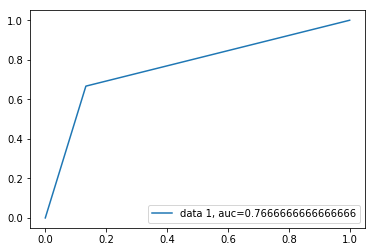

In [45]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [46]:
# K fold cross validation

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)

for train_indices, test_indices in kf.split(X):
    clf.fit(X[train_indices], y[train_indices])

/home/jobin/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Predicting the Test set results
y_pred=[]
for train_indices, test_indices in kf.split(X):
    y_pred1 = clf.score(X[test_indices], y[test_indices])
    y_pred.append(y_pred1)
print "accuracy:", np.mean(y_pred)*100

accuracy: 95.0


In [251]:
# LSTM classifier

In [49]:

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

data = pd.read_csv("../Python/Wavelet_Feature/EEG/S006")

from sklearn.model_selection import train_test_split

X = np.asarray(data[['0', '1', '2', '3', '4', '5']])
tar = np.ones((40,1))
tar1 = np.zeros((40,1))
target=np.concatenate((tar, tar1), axis=0)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# expand dimensions
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# create model
model = Sequential()
model.add(LSTM(10, input_shape = (6, 1), return_sequences = True))
model.add(LSTM(20))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=1000, batch_size=5)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 10)             480       
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
56/56 [==============================] - 1s 13ms/step - loss: 0.6940 - acc: 0.5000
Epoch 2/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6919 - acc: 0.5536
Epoch 3/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6915 - acc: 0.5357
Epoch 4/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6914 - acc: 0.5357
Epoch 5/1000
56/56

56/56 [==============================] - 0s 2ms/step - loss: 0.6814 - acc: 0.5536
Epoch 79/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6816 - acc: 0.5536
Epoch 80/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6806 - acc: 0.5536
Epoch 81/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6803 - acc: 0.5536
Epoch 82/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6799 - acc: 0.5536
Epoch 83/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6807 - acc: 0.5536
Epoch 84/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6802 - acc: 0.5536
Epoch 85/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6778 - acc: 0.5536
Epoch 86/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6771 - acc: 0.5536
Epoch 87/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.6775 - acc: 0.5714
Epoch 88/1000
56/56 [==============================] -

56/56 [==============================] - 0s 2ms/step - loss: 0.5348 - acc: 0.6429
Epoch 163/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5144 - acc: 0.6607
Epoch 164/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5385 - acc: 0.6250
Epoch 165/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5691 - acc: 0.6786
Epoch 166/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5850 - acc: 0.6429
Epoch 167/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5299 - acc: 0.6964
Epoch 168/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4990 - acc: 0.7143
Epoch 169/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4938 - acc: 0.7321
Epoch 170/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4884 - acc: 0.7321
Epoch 171/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4783 - acc: 0.7143
Epoch 172/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.5998 - acc: 0.6071
Epoch 247/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5988 - acc: 0.6607
Epoch 248/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5981 - acc: 0.6250
Epoch 249/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5977 - acc: 0.6786
Epoch 250/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5969 - acc: 0.6607
Epoch 251/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5961 - acc: 0.6250
Epoch 252/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5950 - acc: 0.6250
Epoch 253/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5950 - acc: 0.6429
Epoch 254/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5935 - acc: 0.6250
Epoch 255/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.5928 - acc: 0.6429
Epoch 256/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.3214 - acc: 0.8571
Epoch 331/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3184 - acc: 0.8571
Epoch 332/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3180 - acc: 0.8750
Epoch 333/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3208 - acc: 0.8750
Epoch 334/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3157 - acc: 0.8750
Epoch 335/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3165 - acc: 0.8571
Epoch 336/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3150 - acc: 0.8571
Epoch 337/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3167 - acc: 0.8750
Epoch 338/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3152 - acc: 0.8571
Epoch 339/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3169 - acc: 0.8571
Epoch 340/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.4058 - acc: 0.7679
Epoch 415/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3845 - acc: 0.8393
Epoch 416/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3751 - acc: 0.8214
Epoch 417/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3535 - acc: 0.8750
Epoch 418/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3586 - acc: 0.8750
Epoch 419/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3436 - acc: 0.8571
Epoch 420/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3310 - acc: 0.8750
Epoch 421/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3323 - acc: 0.8750
Epoch 422/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3264 - acc: 0.8750
Epoch 423/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.3234 - acc: 0.8750
Epoch 424/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.2749 - acc: 0.8750
Epoch 499/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2813 - acc: 0.8750
Epoch 500/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2786 - acc: 0.8750
Epoch 501/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2758 - acc: 0.8750
Epoch 502/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2732 - acc: 0.8750
Epoch 503/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2711 - acc: 0.8750
Epoch 504/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2683 - acc: 0.8750
Epoch 505/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2683 - acc: 0.8750
Epoch 506/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2679 - acc: 0.8750
Epoch 507/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2663 - acc: 0.8750
Epoch 508/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.5041 - acc: 0.7679
Epoch 583/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4942 - acc: 0.7679
Epoch 584/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4848 - acc: 0.8929
Epoch 585/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4744 - acc: 0.8929
Epoch 586/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4623 - acc: 0.8750
Epoch 587/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4603 - acc: 0.8571
Epoch 588/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4335 - acc: 0.8929
Epoch 589/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4307 - acc: 0.8750
Epoch 590/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4589 - acc: 0.7321
Epoch 591/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.4758 - acc: 0.7857
Epoch 592/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.1816 - acc: 0.9464
Epoch 667/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.2276 - acc: 0.9107
Epoch 668/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1737 - acc: 0.9464
Epoch 669/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1695 - acc: 0.9286
Epoch 670/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1645 - acc: 0.9464
Epoch 671/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1643 - acc: 0.9464
Epoch 672/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1551 - acc: 0.9643
Epoch 673/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1542 - acc: 0.9643
Epoch 674/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1623 - acc: 0.9464
Epoch 675/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1577 - acc: 0.9464
Epoch 676/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.0765 - acc: 0.9821
Epoch 751/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0777 - acc: 0.9821
Epoch 752/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0838 - acc: 0.9643
Epoch 753/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1392 - acc: 0.9643
Epoch 754/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0900 - acc: 0.9821
Epoch 755/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1225 - acc: 0.9643
Epoch 756/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1517 - acc: 0.9464
Epoch 757/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.1158 - acc: 0.9464
Epoch 758/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0770 - acc: 0.9821
Epoch 759/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0659 - acc: 0.9821
Epoch 760/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.0327 - acc: 0.9821
Epoch 835/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0330 - acc: 0.9821
Epoch 836/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0344 - acc: 0.9821
Epoch 837/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0314 - acc: 0.9821
Epoch 838/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0291 - acc: 0.9821
Epoch 839/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0302 - acc: 0.9821
Epoch 840/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0281 - acc: 0.9821
Epoch 841/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0278 - acc: 0.9821
Epoch 842/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0272 - acc: 0.9821
Epoch 843/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0276 - acc: 1.0000
Epoch 844/1000
56/56 [=======================

56/56 [==============================] - 0s 2ms/step - loss: 0.0107 - acc: 1.0000
Epoch 919/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0103 - acc: 1.0000
Epoch 920/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 1.0000
Epoch 921/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0101 - acc: 1.0000
Epoch 922/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0097 - acc: 1.0000
Epoch 923/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0097 - acc: 1.0000
Epoch 924/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0094 - acc: 1.0000
Epoch 925/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0094 - acc: 1.0000
Epoch 926/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0092 - acc: 1.0000
Epoch 927/1000
56/56 [==============================] - 0s 2ms/step - loss: 0.0090 - acc: 1.0000
Epoch 928/1000
56/56 [=======================

In [50]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [51]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  2]
 [ 2  7]]


In [52]:
total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/float(total1)
print "Accuracy : %f" %(accuracy1*100)

sensitivity1 = float(cm[0,0])/(cm[0,0]+cm[0,1])
print"Sensitivity :%f" %(sensitivity1*100)

specificity1 = float(cm[1,1])/(cm[1,0]+cm[1,1])
print"Specificity :%f"%(specificity1*100)

precision1 = float(cm[0,0])/(cm[0,0]+cm[1,1])
print"Precision :%f" %(precision1*100)

Accuracy : 83.333333
Sensitivity :86.666667
Specificity :77.777778
Precision :65.000000
